# Using Randomization

Recovering Lost Figures: Visualizing Confounders and Causal Inference

## The Paradox: Who *Really* Is the Better Surgeon?

> **A Tale of Two Surgeons**
>
> *Paraphrased from* (Taleb 2017)
>
> <img src="docSideBySide.jpg" alt="Doc Dreamy and Doc Duck side by side" style="max-width: 250px; height: auto; border-radius: 5px;">
>
> Imagine you need to choose between two surgeons of similar rank at the
> same hospital. The first surgeon, Doc Dreamy, matches our stereotype
> perfectly: refined appearance, silver-rimmed glasses, delicate hands,
> measured speech, and an office adorned with Ivy League diplomas (see
> the image). The second surgeon, Doc Duck, by contrast, looks more like
> a butcher—overweight, with large hands, an unkempt appearance, and no
> visible credentials on the wall.
>
> Counterintuitively, the surgeon who doesn’t “look the part” may
> actually be the better choice. Why? Because when someone succeeds in
> their profession despite not fitting the expected appearance, it
> suggests they had to overcome significant perceptual biases. And if we
> are lucky enough to have people who do not look the part, it is thanks
> to the presence of some skin in the game, the contact with reality
> that filters out incompetence. (Taleb 2017)

## Observational Data: A Misleading Victory for Doc Dreamy

Number of patients: 100

Let’s use data to figure out which surgeon performs better.
<a href="#fig-plot-outcomes" class="quarto-xref">Figure 1</a> shows the
post-surgical symptom score for 100 patients. Doc Duck’s average
post-surgical symptom score is 3.38 while Doc Dreamy’s average is 2.8.
Doc Dreamy performs better since lower scores indicate better outcomes.
One might ask if the difference in average post-surgical symptom score
is statistically significant. A two-sample t-test reveals a
statistically significant difference (t = -2.317, p = 0.023).

## The Hidden Confounder: Patient Severity Explains It All

As readers of
<a href="#fig-plot-outcomes" class="quarto-xref">Figure 1</a>, the
easiest path for our brains is to accept the mental model of surgical
outcomes depicted in
<a href="#fig-example-node" class="quarto-xref">Figure 2</a>.

<figure id="fig-example-node">
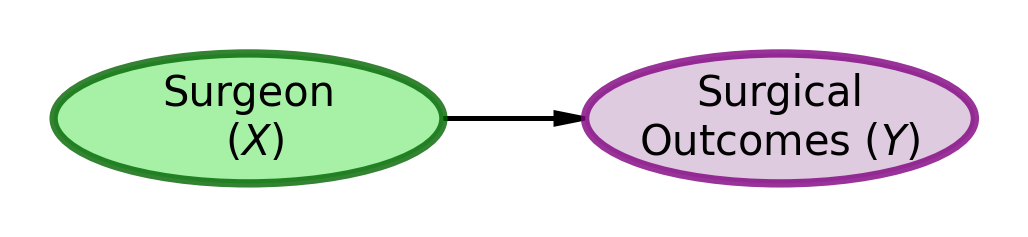
<figcaption>Figure 2: DAG Model Explaining Surgical
Outcomes</figcaption>
</figure>

The obvious conclusion from using the mental model of
<a href="#fig-example-node" class="quarto-xref">Figure 2</a> and the
data shown in
<a href="#fig-plot-outcomes" class="quarto-xref">Figure 1</a> is that
**Doc Dreamy is the superior surgeon because his patients’ scores are
lower than Doc Duck’s patients’ scores**.

However, a “common cause” confounder can create an association between
$X$ and $Y$ that is not causal in nature. For example, if $X$ is puddles
on the road and $Y$ is people with umbrellas, it does not mean that the
puddles cause people to have umbrellas. Instead, a common cause for
both, namely rain ($Z$), is the sole reason for the observed
association. The presence of rain causes both puddles and people to
carry umbrellas, creating a spurious correlation between the two.

As Nassim Taleb hints, there may be an alternate explanation. Consider
the model shown in
<a href="#fig-example2-node" class="quarto-xref">Figure 3</a>. Might
there be an unaccounted for common cause that is causing the association
between surgeon choice and surgical outcomes?

<figure id="fig-example2-node">
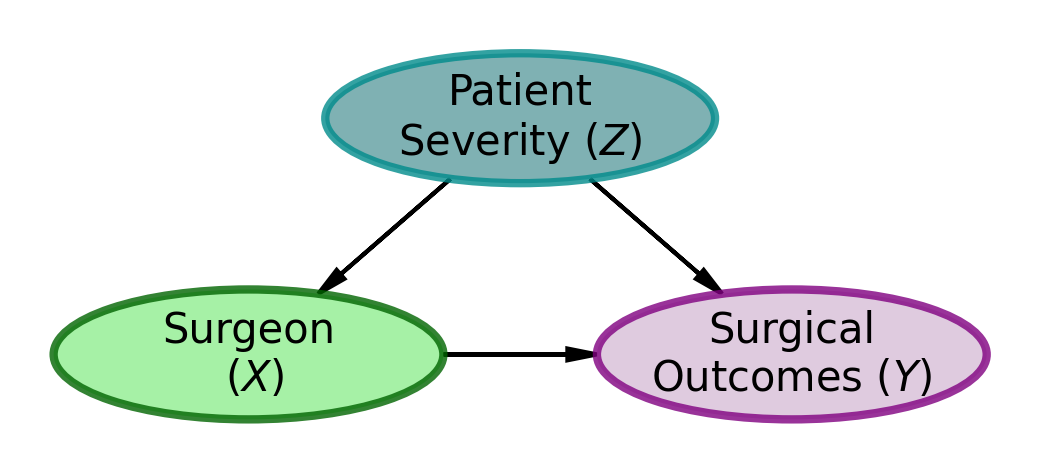
<figcaption>Figure 3: DAG Model Explaining Surgical
Outcomes</figcaption>
</figure>

A possible common-cause story would go something like this. Both
surgeons have full schedules, with Dr. Dreamy scheduling surgeries 3
weeks in advance and Dr. Duck scheduling surgeries 1 week in advance. As
such, patients who are not in a rush, usually those with low severity,
are more likely to choose Dr. Dreamy based on his website and picture.
However, patients who are in more of a rush, usually those with high
severity, are more likely to choose Dr. Duck based on his availability
and the fact that he is the only surgeon who can see them immediately.

> **Assumption: Slow Progression of Patient Severity**
>
> For simplicity, we assume that patient severity progresses slowly
> enough that a 2-week delay (i.e., waiting for Dr. Dreamy’s
> availability) has zero effect on surgical outcomes. This delay affects
> only how quickly patients receive surgical relief, not the eventual
> outcome itself. While time-to-surgery can be an important factor in
> other contexts, here we focus solely on whether initial patient
> severity might create a spurious or biased association between surgeon
> choice and outcomes.

## Solution 1: Randomization — Break the Confounding Path

The gold standard to establish causation is a randomized controlled
trial. Instead of letting patients choose their surgeon, we randomly
assign them to either Dr. Dreamy or Dr. Duck.

This is precisely the kind of problem randomization can solve. By
randomly assigning patients to surgeons, we break the potential
confounding relationship where patient severity ends up correlated with
choice of surgeon. Since assignment is now random rather than based on
patient choice between a good-looking doctor and a doctor available more
quickly, we eliminate this confounding pathway. This break, pictured in
<a href="#fig-example3-node" class="quarto-xref">Figure 4</a>, allows us
to assess whether surgeon identity truly matters for surgical success,
or if the observed association was merely due to patient severity
influencing both surgeon choice and outcomes.

<figure id="fig-example3-node">
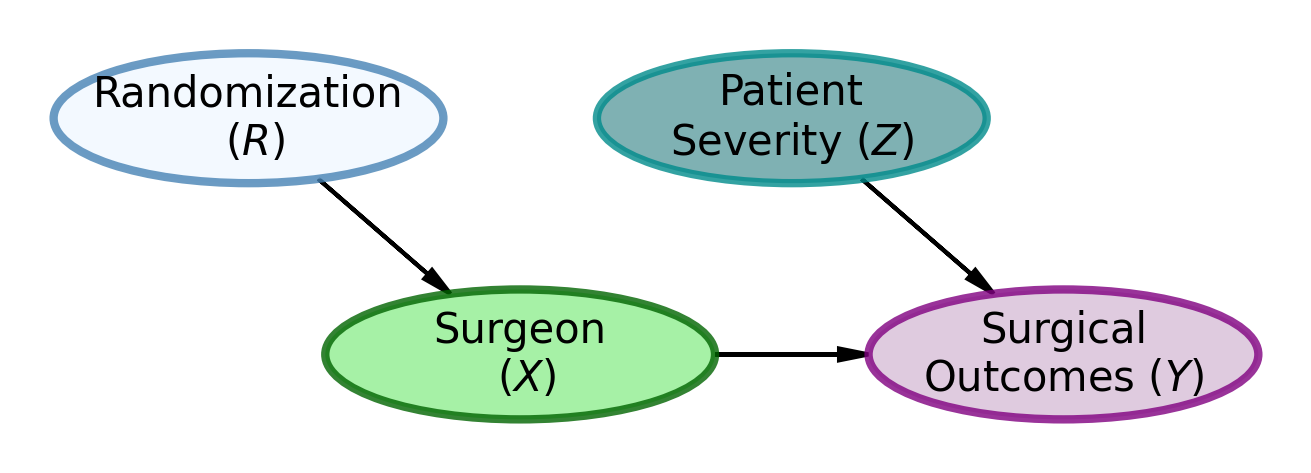
<figcaption>Figure 4: DAG Model Explaining Surgical
Outcomes</figcaption>
</figure>

<a href="#fig-example3-node" class="quarto-xref">Figure 4</a> shows the
DAG model for the randomization scenario. In this scenario, patient
severity ($Z$) is no longer a cause of surgeon choice ($X$). Instead,
randomization ($R$) completely determines surgeon assignment ($X$). This
breaks the confounding relationship between patient severity and surgeon
choice, allowing us to assess whether the surgeons themselves truly
matter for surgical outcomes.

### Our data doesn’t have counterfactuals, how can we know what would have happened to those patients if we had randomized?

> **What is a counterfactual?**
>
> A *counterfactual* is the answer to a “what if” question: what would
> have happened if circumstances had been different? Specifically, what
> would each patient’s outcome have been if they had been assigned to
> the *other* surgeon, holding everything else constant? These are the
> unobserved alternative outcomes—the outcomes that didn’t happen but
> could have happened under different treatment assignment.

Unfortunately, we can’t observe what didn’t happen. The patients we
already observed went to the surgeon they chose (or who was available),
and we’ll never know their outcomes under the alternative assignment.
This is the fundamental problem of causal inference: we only see one
world, not the parallel universe where everything else was held constant
but the treatment differed.

Since we cannot rerun history with randomization, we run an experiment
to collect the data we need. So, we randomly assigned a sequence of 100
patients to either Dr. Dreamy or Dr. Duck and observed the following
data:

Number of randomized patients: 100

<a href="#fig-plot-outcomes-randomized" class="quarto-xref">Figure 5</a>
shows the post-surgical symptom score for 100 patients under randomized
assignment. Doc Duck’s average post-surgical symptom score is 2.71 while
Doc Dreamy’s average is 3.46. Doc Duck performs better since lower
scores indicate better outcomes. With randomization breaking the
confounding relationship, we can now properly assess the causal effect.
A two-sample t-test reveals a statistically significant difference (t =
2.734, p = 0.007). **Not only is Dr. Dreamy not the better surgeon, he
is actually the worse surgeon!**

### Challenge Task 2: Recover Figure 2 — Randomized Assignment Outcomes

## Solution 2: Stratification — When You Can’t Randomize

The key to handling a common cause confounder is to stratify by the
common cause. In general, this means we examine the relationship between
treatment and outcome within groups that share the same value of the
confounder. In our example, this means we look at patients of similar
severity and compare the outcomes of the surgeons for patients of
similar severity. There are mathematically sophisticated ways to do
this, but here we demonstrate it visually. Since patient number lacks
inherent meaning, the following figure shows patient severity on the
x-axis and post-surgical symptom score on the y-axis.

### Challenge Task 3: Recover Figure 3 — Outcomes by Patient Severity (Stratification)

Looking at
<a href="#fig-plot-outcomes-severity" class="quarto-xref">Figure 6</a>,
the value of stratifying by severity is visually most obvious with
initial patient severity scores between -1 and 1 (highlighted in the
overlay). We chose this region because it shows substantial overlap
between the two surgeons—both surgeons have considerable data within
this range, making it an ideal region for comparing their performance.
Outside of this range, there is less data available for making direct
comparisons: Doc Duck sees more of the higher-severity patients
(severity \> 1), while Doc Dreamy sees more of the lower-severity
patients (severity \< -1).

Within the highlighted region, Doc Dreamy’s blue circles tend to be
higher (worse) than Doc Duck’s red triangles for these patients. It is
also obvious that Doc Duck is seeing the more severe patients overall,
as his red triangles are generally to the right of Doc Dreamy’s blue
circles on the x-axis. This is exactly what we would expect if patient
severity were a common cause of surgeon choice and surgical outcomes.
Despite the aggregate statistics pointing to Doc Dreamy having lower
(better) post-surgical symptom scores on average, our visual analysis of
this overlapping region leads us to conclude that Doc Duck is actually
the better surgeon—a conclusion that would be obscured if we only looked
at the means without stratifying by severity.

Enhanced Figure 3 to show that Doc Duck performs better when controlling
for patient severity. Changes: Regression lines: Added trend lines for
each doctor to show the relationship between severity and outcomes.
Stratified means: Calculated and displayed means within the
stratification region (-1 to 1 severity) with dotted horizontal lines,
showing performance for similar-severity patients. Visual comparison:
Overall means (dashed lines) show the confounding effect Stratified
means (dotted lines) show the true comparison Annotations highlight the
stratified means in the overlapping region Highlight annotation: Added
an annotation stating how much better Doc Duck performs in the
overlapping severity region, with an arrow pointing to the comparison.
Legend: Cleaned up to exclude trend lines and the stratification region.
The figure shows: Overall, Doc Dreamy appears better (due to
confounding) When controlling for severity (stratification region -1 to
1), Doc Duck performs better The regression lines show the trends,
making the comparison clearer This aligns with Figure 2 (randomized
data), where Doc Duck is shown to be the better doctor. Re-render the
document to see the updated figure.

## How to Solve the Confounder Challenge

Here’s the problem with graphs and statistics in general: the numbers
can easily mislead you. Or rather, you can be misled *by* the numbers
when you don’t understand what they’re really telling you.

When you just look at the raw data and ask who had better outcomes, Doc
Dreamy wins. Lower scores look great on paper. But here’s where it gets
important: that association doesn’t mean what you think it means.
Correlation is not causation, and we all know that, but we forget it
every single time because our brains are wired to see patterns and
assign causes.

The real villain here is patient severity. It operates like a puppeteer
behind the curtain, making Doc Dreamy look good by sending him easier
cases while sending Doc Duck the harder ones. When you don’t randomize,
you can’t tell the difference between “Doc Dreamy is a better surgeon”
and “Doc Dreamy got lucky with his patient assignment.” On any graph or
in any headline, look for the common-cause-confounder villian that is
unaccounted for.

Randomization is an excellent defense against this kind of confounding.
Flip a coin, assign patients randomly, and suddenly the puppeteer loses
control. Now you can actually see who the better surgeon is. And the
surprise is that it’s the one who doesn’t look the part. The data wasn’t
lying; it was just answering a different question than you thought you
were asking.

If you can’t randomize, and that’s most of the time, you stratify. Look
within groups of similar patient severity. Compare apples to apples, not
apples to oranges. It’s more work, and it’s less satisfying than a clean
randomized trial, but it’s better than being fooled by confounding.

The take-home lesson: The world is messy, and the numbers will mislead
you if you let them. But if you understand the structure of the problem,
if you draw the DAG and think about what causes what, you can defend
yourself against being fooled. Randomization when you can,
stratification when you can’t. The tools are simple. The hard part is
remembering to use them.

Taleb, Nassim Nicholas. 2017. “Surgeons Should Not Look Like Surgeons.”
<https://medium.com/incerto/surgeons-should-notlook-like-surgeons-23b0e2cf6d52>.